In [1]:
from QMLE_scipy import *
from explore import *

### 1. Test k=2

In [2]:
# set up initial guess
sigma = 1
lam = 0.5
gamma = 0.1
rho = 0.2
beta = np.array([1,2])
params = [sigma,lam,gamma, rho, *beta]
params

# set up input data
n = 4
T = 4
k = 2
alpha = np.random.normal(0,1,4)
c0 = np.random.normal(0,1,4)
x1 = []
for i in range(T):
    x1.append(np.random.normal(0,1,n*k).reshape(n,k))
y1 = []
for i in range(T+1):
    y1.append(np.random.normal(0,1,4))
# manually setting up a row-normalized spatial weight vector with 0 diagonals for even time points
w0 = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,1,0,0]]).reshape(4,4)
w1 = np.array([[0,0,1,0],[1,0,0,0],[0,1,0,0],[1,0,0,0]]).reshape(4,4)
W_ls = []
for i in range(T+1):
    if is_even(i):
        W_ls.append(w0)
    else:
        W_ls.append(w1)

In [4]:
# run optimization with constraints
result = QMLE_scipy_estimate(x1, y1, W_ls,initial_guess = params,est_coeff = False)

In [5]:
result.params

[0.49586873520131247,
 0.3959356650414986,
 -0.43688592069944676,
 -0.4337395322272445,
 array([1.06785458, 0.34443844])]

In [6]:
result.asymptotic_var

array([[ 0.04972172,  0.01657139, -0.00316458, -0.02297461, -0.02782273,
        -0.00853657],
       [ 0.01657139,  0.04013142, -0.01246774, -0.00673334, -0.05114575,
        -0.01284192],
       [-0.00316458, -0.01246774,  0.06048085,  0.0072847 ,  0.05542679,
         0.01354423],
       [-0.02297461, -0.00673334,  0.0072847 ,  0.04378515,  0.01898012,
         0.00581362],
       [-0.02782273, -0.05114575,  0.05542679,  0.01898012,  0.16521965,
         0.04156153],
       [-0.00853657, -0.01284192,  0.01354423,  0.00581362,  0.04156153,
         0.03318458]])

In [7]:
result.gamma()

-0.43688592069944676

In [8]:
result.residual_mean()

0.12218617953145419

In [9]:
result.residual_std()

0.6133201090400444

Plotting qqplot of residuals at time t = 2 .



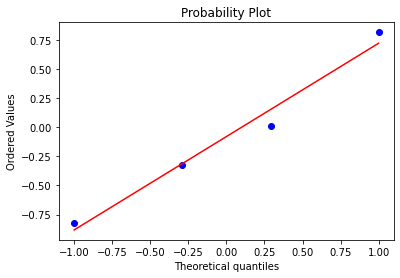

In [10]:
result.plot_residual(t = 2)

In [11]:
result.print_table()

Residuals:
      Min         1Q      Median        3Q      Max
---------  ---------  ----------  --------  -------
-0.826353  -0.322855  0.00425985  0.615174  1.39649

Estimated Parameters:
   Sigma    Lambda      Gamma       Rho  Beta
--------  --------  ---------  --------  -----------------------
0.495869  0.395936  -0.436886  -0.43374  [1.06785458 0.34443844]

Estimated alpha (display first 10 rows): 
  alpha_0    alpha_1    alpha_2    alpha_3
---------  ---------  ---------  ---------
 -1.12793   0.454574   -0.17381   0.847166

Estimated c0 (display first 10 rows): 
     c0_0       c0_1       c0_2      c0_3
---------  ---------  ---------  --------
-0.385585  -0.338181  0.0522676  0.114208

Estimated asympotitic variance: 
               Gamma          Rho       Beta_0       Beta_1      Lambda      Sigma^2
-------  -----------  -----------  -----------  -----------  ----------  -----------
Gamma     0.0497217    0.0165714   -0.00316458  -0.0229746   -0.0278227  -0.00853657
Rho    

In [12]:
result = QMLE_scipy_estimate(x1, y1, W_ls,initial_guess = params, constrain= False)

In [13]:
result.print_table()

Residuals:
      Min         1Q     Median        3Q      Max
---------  ---------  ---------  --------  -------
-0.826352  -0.322858  0.0042606  0.615172  1.39649

Estimated Parameters:
   Sigma    Lambda      Gamma        Rho  Beta
--------  --------  ---------  ---------  -----------------------
0.495867  0.395935  -0.436886  -0.433744  [1.06785358 0.34443582]

Estimated alpha (display first 10 rows): 
  alpha_0    alpha_1    alpha_2    alpha_3
---------  ---------  ---------  ---------
 -1.12793   0.454573   -0.17381   0.847166

Estimated c0 (display first 10 rows): 
     c0_0       c0_1       c0_2      c0_3
---------  ---------  ---------  --------
-0.385585  -0.338179  0.0522664  0.114205

Estimated asympotitic variance: 
               Gamma          Rho       Beta_0       Beta_1      Lambda      Sigma^2
-------  -----------  -----------  -----------  -----------  ----------  -----------
Gamma     0.0497214    0.0165715   -0.00316469  -0.0229745   -0.0278232  -0.00853673
Rho    

Plotting qqplot of residuals from t = 1 to t =  4 .



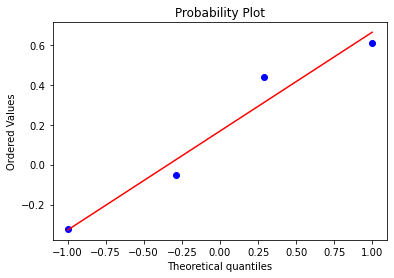

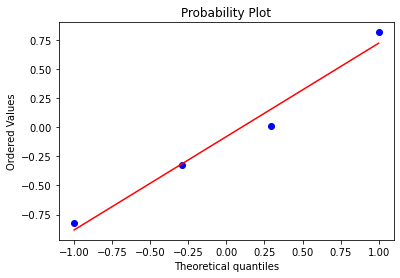

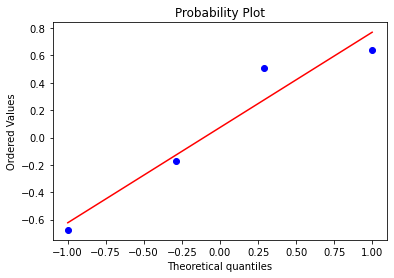

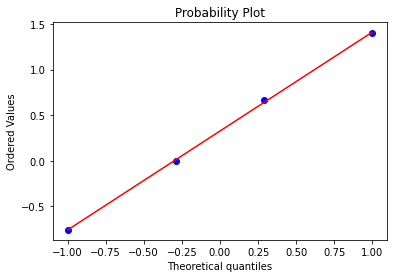

In [14]:
result.plot_residual(plot_all = True)

### 2. Test k=1

In [15]:
# set up initial guess
initial_guess = [1.5,0.2,0.5,0.3,1.2] # in the order sigma, lam, gamma, rho, beta (all real numbers)

n = 20
k = 1
T = 10

# generate samples
t_theta = [0.1,0.2,np.array([1]).reshape(k,1),0.5,1] # true parameters
t_gamma, t_rho, t_beta, t_lam, t_sig = t_theta
alpha = np.random.normal(0,1,T).reshape(T,1)
c0 = np.random.normal(0,1,n).reshape(n,1)
l_n = np.ones(n).reshape(n,1)
x = []
for i in range(T):
    x.append(np.random.normal(0,1,n).reshape(n,k))
# manually setting up a row-normalized spatial weight vector with 0 diagonals for even time points
w0 = generate_weight_matrix(n)
w1 = generate_weight_matrix(n)

W_ls = []
for i in range(T+1):
    if is_even(i):
        W_ls.append(w0)
    else:
        W_ls.append(w1)

        V_nt = []
for i in range(T):
    V_nt.append(np.random.normal(0,t_sig,n).reshape(n,1))

Y0 = np.random.normal(0,1,n).reshape(n,1)

y = []
y.append(Y0)
for i in range(T):
    c_vec = t_gamma*y[i]+t_rho*np.matmul(W_ls[i],np.array(y[i]).reshape(n,1))+np.matmul(x[i],np.array(t_beta).reshape(k,1))+c0+alpha[i][0]*l_n+V_nt[i]
    Y_nt = np.matmul(np.linalg.inv(np.identity(n)-t_lam*W_ls[i+1]),c_vec).reshape(n,1)
    y.append(Y_nt)

In [16]:
result = QMLE_scipy_estimate(x, y, W_ls,initial_guess = initial_guess, constrain= False)

In [17]:
result.print_table()

Residuals:
     Min        1Q      Median        3Q      Max
--------  --------  ----------  --------  -------
-3.24045  -0.75232  0.00395207  0.863365  2.25737

Estimated Parameters:
   Sigma    Lambda      Gamma       Rho     Beta
--------  --------  ---------  --------  -------
0.865333  0.489795  0.0207532  0.245424  1.04003

Estimated alpha (display first 10 rows): 
  alpha_0    alpha_1    alpha_2    alpha_3    alpha_4    alpha_5    alpha_6    alpha_7    alpha_8    alpha_9
---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
0.0837298   0.428715   0.195238  -0.219928  -0.685684   0.110307   0.460661  -0.534915   0.776553  -0.614676

Estimated c0 (display first 10 rows): 
    c0_0      c0_1        c0_2         c0_3        c0_4      c0_5      c0_6       c0_7      c0_8       c0_9
--------  --------  ----------  -----------  ----------  --------  --------  ---------  --------  ---------
-1.10701  0.529385  -0.0782111  -0.00248125

Plotting qqplot of residuals at time t = 1 .



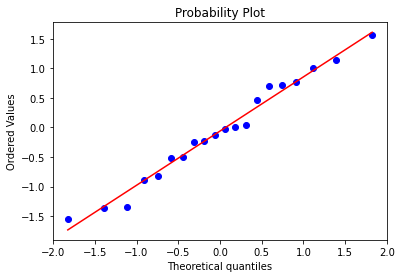

In [18]:
result.plot_residual()

In [19]:
result = QMLE_scipy_estimate(x, y, W_ls,initial_guess = initial_guess, constrain= False)

In [20]:
result.print_table()

Residuals:
     Min        1Q      Median        3Q      Max
--------  --------  ----------  --------  -------
-3.24045  -0.75232  0.00395207  0.863365  2.25737

Estimated Parameters:
   Sigma    Lambda      Gamma       Rho     Beta
--------  --------  ---------  --------  -------
0.865333  0.489795  0.0207532  0.245424  1.04003

Estimated alpha (display first 10 rows): 
  alpha_0    alpha_1    alpha_2    alpha_3    alpha_4    alpha_5    alpha_6    alpha_7    alpha_8    alpha_9
---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
0.0837298   0.428715   0.195238  -0.219928  -0.685684   0.110307   0.460661  -0.534915   0.776553  -0.614676

Estimated c0 (display first 10 rows): 
    c0_0      c0_1        c0_2         c0_3        c0_4      c0_5      c0_6       c0_7      c0_8       c0_9
--------  --------  ----------  -----------  ----------  --------  --------  ---------  --------  ---------
-1.10701  0.529385  -0.0782111  -0.00248125

Plotting qqplot of residuals at time t = 1 .



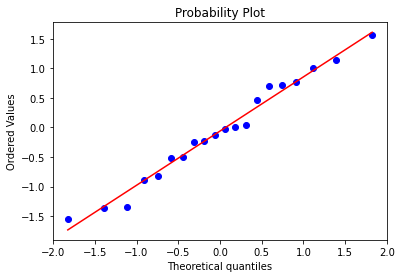

In [21]:
result.plot_residual()